# South African Language Identification Hack 2022

## Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

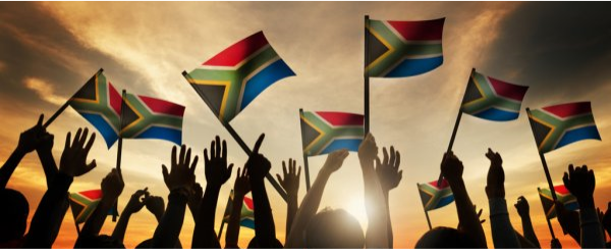

### The Breif:

In this challenge, the task will be to take text which is in any of South Africa's 11 Official languages and identify which language the text is in. 

This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a id="cont"></a>

# Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Preprocessing</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
### Packages to be Imported and their uses

- Numpy: For arrays, algebra and Mathematical Calculations.
- Pandas: For Dataframe Manipulation and Statistical calculations such as mean.
- Matplotlib: For ploting normal charts and graphs.
- Sklearn:  For predictive data analysis
- nlkt: The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language.
- and many more.

In [1]:
#importing the required libraries
#!pip install wordCloud
# Libraries for data loading, data manipulation and data visulisation
import numpy as np                     
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Customise our plotting settings
sns.set_style('whitegrid')

#Libraries for data cleaning and preprocessing
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from sklearn.utils import resample
import string
import re
import pickle
import nltk
import string
stop = stopwords.words('english')

#Libraries for data preparation and model building
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score # Classification report

from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## 2. Loading the Data

**The data used for this project are:**
i. Train Dataset
ii. Test Dataset

They contain information gotten from different languages in South Africa, and the goal is to build a model that can classifier a given sentence according to each South African language using the given data set.

In [2]:
# loading data
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [3]:
# Viewing content of the Train dataset
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
# Viewing the test dataset
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


## 3. Exploratory Data Analysis

In [5]:
# Printing the information about the train dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [6]:
# Printing the data types of the features and target variables
train.dtypes

lang_id    object
text       object
dtype: object

In [7]:
# Counting the total entries of individual languages
train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

The above result, shows that it is not a case of class imbalance. All language classes are equally distributed with each having equal number of entries, i.e 3000 entries. The graphic representation of this observation is shown in the following plot.

<AxesSubplot:title={'center':'Bar Plot Showing the Distribution of Different Languages'}, xlabel='lang_id', ylabel='count'>

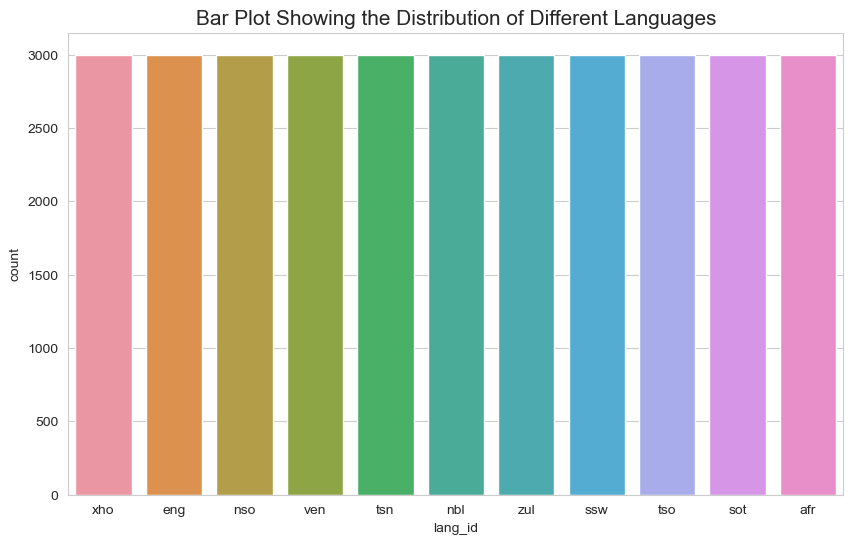

In [8]:
# Plotting the distribution of the languages
plt.figure(figsize=(10,6))
plt.title('Bar Plot Showing the Distribution of Different Languages', fontsize=15)
sns.countplot(x='lang_id', data=train)

In [10]:
# Making a copy of our dataframes before cleaning
df_train = train
df_test = test

## Building the WordCloud of the train data before Preprocessing

It showvcases the most frequent word with bigger and bolder letters, and with different colors. 

Key to note: The smaller the the size of the word the lesser its' important.

In [12]:
xho = df_train[(df_train['lang_id'] == 'xho')]
eng = df_train[(df_train['lang_id'] == 'eng')]
nso = df_train[(df_train['lang_id'] == 'nso')]
ven = df_train[(df_train['lang_id'] == 'ven')]
tsn = df_train[(df_train['lang_id'] == 'tsn')]
nbl = df_train[(df_train['lang_id'] == 'nbl')]
zul = df_train[(df_train['lang_id'] == 'zul')]
ssw = df_train[(df_train['lang_id'] == 'ssw')]
tso = df_train[(df_train['lang_id'] == 'tso')]
sot = df_train[(df_train['lang_id'] == 'sot')]
afr = df_train[(df_train['lang_id'] == 'afr')]

Text(0.5, 1.0, 'XHO')

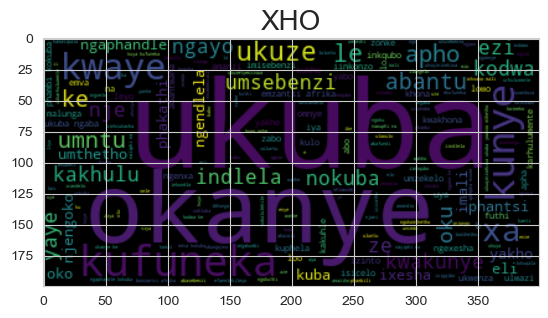

In [13]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(xho.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('XHO',fontsize=20)

Text(0.5, 1.0, 'ENG')

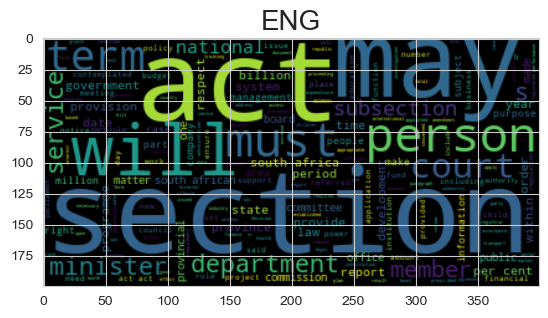

In [14]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(eng.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('ENG',fontsize=20)

Text(0.5, 1.0, 'NSO')

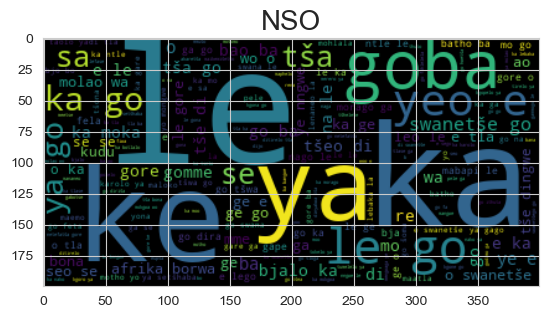

In [15]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(nso.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('NSO',fontsize=20)

Text(0.5, 1.0, 'VEN')

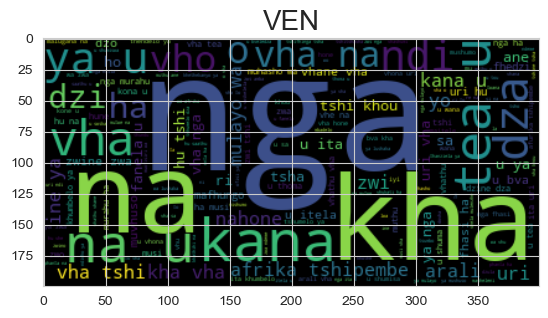

In [16]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(ven.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('VEN',fontsize=20)

Text(0.5, 1.0, 'TSN')

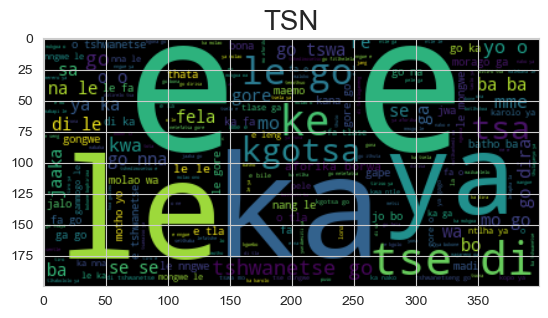

In [17]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(tsn.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('TSN',fontsize=20)

Text(0.5, 1.0, 'NBL')

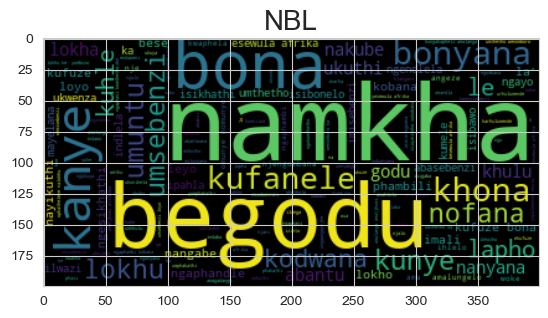

In [18]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(nbl.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('NBL',fontsize=20)

Text(0.5, 1.0, 'ZUL')

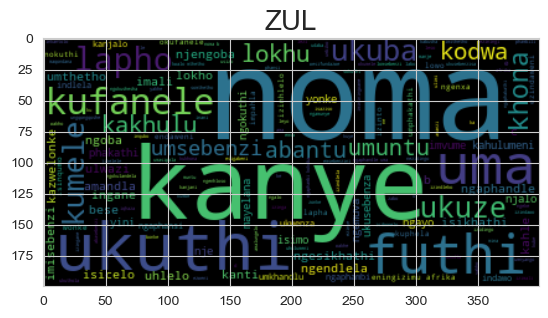

In [19]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(zul.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('ZUL',fontsize=20)

Text(0.5, 1.0, 'SSW')

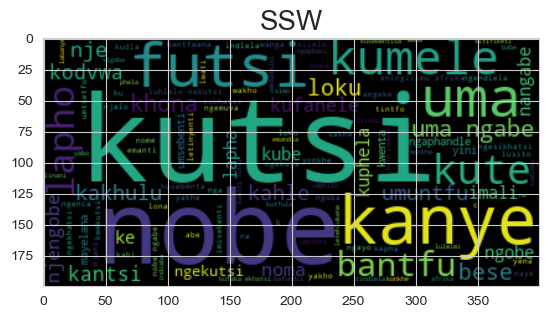

In [20]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(ssw.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('SSW',fontsize=20)

Text(0.5, 1.0, 'TSO')

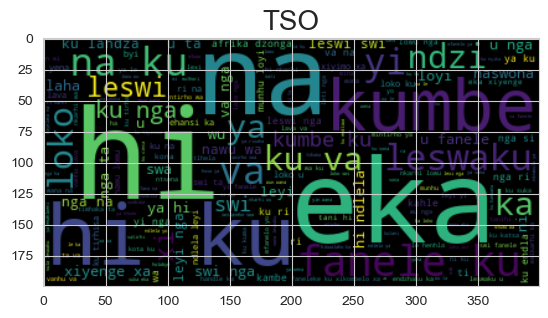

In [21]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(tso.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('TSO',fontsize=20)

Text(0.5, 1.0, 'SOT')

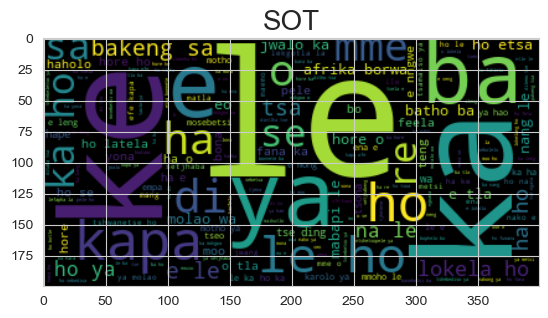

In [22]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(sot.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('SOT',fontsize=20)

Text(0.5, 1.0, 'AFR')

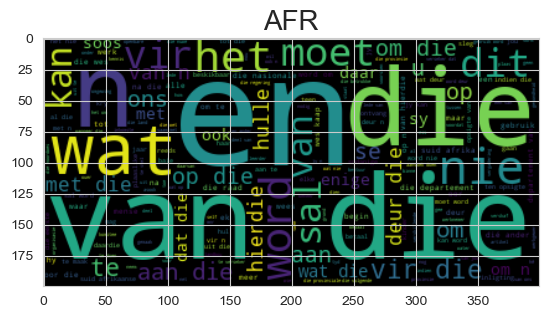

In [23]:
plt.figure()
wc = WordCloud(max_words = 200).generate(" ".join(afr.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('AFR',fontsize=20)

## 4. Data Preprocessing

In [24]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# Viewing our train dataframe once more before cleaning 
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [26]:
# nltk.download('stopwords')
# stop = stopwords.words('english')
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [27]:
# nltk.download('wordnet')
# Building the function that will perform a one-time cleaning for both datasets
# This function also performs lemmatization of the words in the datasets
from bs4 import BeautifulSoup
def review_to_words(raw_message):
    # 1. Delete HTML 
    message_text = BeautifulSoup(raw_message, 'html.parser').get_text()
    #letters2 =raw_message.replace('http\S+|www.\S+', '', case=False)
    # 2. Make a space
    letters3 = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', message_text)
    letters_only = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))', '', 
                          letters3, flags=re.MULTILINE)
    letters = re.sub('[^a-zA-Z]', ' ',  letters_only)
    letters1 = re.sub(r'http', ' ', letters)
    
    #letters2 = re.sub("\n", "", letters1)
     
    # 3. lower letters
    words = letters1.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [28]:
# Applying the function that will clean the datasets - train and test.
df_train['cleaned_text'] = df_train['text'].apply(review_to_words)
df_test['cleaned_text'] = df_test['text'].apply(review_to_words)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [29]:
# Viewing the cleaned test dataset
df_test.head()

,index,text,cleaned_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo kgethegileng letlelela kgat...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta


In [30]:
# Creating the new dataframes to be used for training and testing
use_train = df_train[['lang_id', 'cleaned_text']]
use_test = df_test['cleaned_text']

# View the new train data
use_train.head()

,lang_id,cleaned_text
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,dha iya kuba nobulumko bokubeka umsebenzi naph...
2,eng,province kwazulu natal department transport in...
3,nso,netefat gore ba file dilo ka moka e le dumelel...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [31]:
# View the new test data
use_test.head()

0    mmasepala fa maemo kgethegileng letlelela kgat...
1    uzakwaziswa ngokufaneleko nakungafuneka eminye...
2            tshivhumbeo tshi fana na ngano dza vhathu
3    kube inja nelikati betingevakala kutsi titsini...
4                         winste op buitelandse valuta
Name: cleaned_text, dtype: object

In [32]:
# Assigning the X-features and Y-targets of the train datasets to X and y
# This is used to build trained and test data
X = use_train['cleaned_text']
y = use_train['lang_id']

X.head()

0    umgaqo siseko wenza amalungiselelo kumaziko ax...
1    dha iya kuba nobulumko bokubeka umsebenzi naph...
2    province kwazulu natal department transport in...
3    netefat gore ba file dilo ka moka e le dumelel...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: cleaned_text, dtype: object

In [33]:
# Creating the train and test 
# The train-test split is a technique for evaluating the performance of a machine learning algorithm. 
# The procedure involves taking a dataset and dividing it into two subsets.

X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y,test_size=0.1, random_state=0)

### Vectorization

Text Vectorization is the process of converting text into numerical representation. 
Here we will apply two different vectorization techniques and evaluate their performance with our models.

The vectorizers used here are:

1. CountVectorizer

Count Vectorization involves counting the number of occurrences each words appears in a document (i.e distinct text such as an article, book, even a paragraph!)

2. TfidfVectorizer

computes the word counts, IDF values, and Tf-idf scores all using the same dataset

In [34]:
count_vectorizer = CountVectorizer(stop_words='english')

vec_train = count_vectorizer.fit_transform(X_train)
vec_test = count_vectorizer.transform(X_test)

use_vectest = count_vectorizer.transform(use_test)

In [35]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.2)

vec_train2 = tfidf_vectorizer.fit_transform(X_train)
vec_test2 = tfidf_vectorizer.transform(X_test)

use_vectest2 = tfidf_vectorizer.transform(use_test)

## 5. Modeling

#### 5.1 Naive Bayes model with Count Vectorizer

In [36]:
mNB = MultinomialNB()
mNB.fit(vec_train, y_train)
pred1 = mNB.predict(vec_test)

print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       1.00      1.00      1.00       300
         nbl       1.00      1.00      1.00       300
         nso       1.00      1.00      1.00       300
         sot       1.00      1.00      1.00       300
         ssw       1.00      1.00      1.00       300
         tsn       1.00      1.00      1.00       300
         tso       1.00      1.00      1.00       300
         ven       1.00      1.00      1.00       300
         xho       1.00      1.00      1.00       300
         zul       1.00      1.00      1.00       300

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [37]:
sub_pred = mNB.predict(use_vectest)

submission = test[['index']]
submission['lang_id']= sub_pred
submission.to_csv('vec_submission1.csv', index = None)

C:\Users\FK Digital\AppData\Local\Temp\ipykernel_6428\2120998977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['lang_id']= sub_pred


In [38]:
vec_train2.shape

(29700, 130059)

#### 5.2 Naive Bayes with Tfidf Vectorizer

In [39]:
mNB = MultinomialNB()
mNB.fit(vec_train2, y_train)
pred1b = mNB.predict(vec_test2)

print(classification_report(y_test, pred1b))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       1.00      1.00      1.00       300
         nbl       1.00      1.00      1.00       300
         nso       1.00      1.00      1.00       300
         sot       1.00      1.00      1.00       300
         ssw       1.00      1.00      1.00       300
         tsn       1.00      1.00      1.00       300
         tso       1.00      1.00      1.00       300
         ven       1.00      1.00      1.00       300
         xho       1.00      1.00      1.00       300
         zul       1.00      1.00      1.00       300

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [40]:
sub1b = mNB.predict(use_vectest2)

submission1b = test[['index']]
submission1b['lang_id']= sub1b
submission1b.to_csv('submission1b.csv', index = None)

C:\Users\FK Digital\AppData\Local\Temp\ipykernel_6428\1368756496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission1b['lang_id']= sub1b


#### 5.3 Logistic Regression with Count Vectorizer

In [41]:
lr = LogisticRegression()
lr.fit(vec_train, y_train)
log_pred = lr.predict(vec_test)

print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       1.00      1.00      1.00       300
         nbl       0.99      0.99      0.99       300
         nso       1.00      1.00      1.00       300
         sot       1.00      1.00      1.00       300
         ssw       0.99      0.99      0.99       300
         tsn       1.00      1.00      1.00       300
         tso       1.00      1.00      1.00       300
         ven       1.00      1.00      1.00       300
         xho       0.99      1.00      0.99       300
         zul       0.99      0.99      0.99       300

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
log_sub = lr.predict(use_vectest)

submission_log = test[['index']]
submission_log['lang_id']= log_sub
submission_log.to_csv('vec_logistic.csv', index = None)

C:\Users\FK Digital\AppData\Local\Temp\ipykernel_6428\3127179376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_log['lang_id']= log_sub


#### 5.4 Logistic Regression Model with Tfidf Vectorizer

In [43]:
lr2 = LogisticRegression()
lr2.fit(vec_train2, y_train)
tfidf_log_pred = lr2.predict(vec_test2)

print(classification_report(y_test, tfidf_log_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       1.00      1.00      1.00       300
         nbl       1.00      0.99      0.99       300
         nso       1.00      1.00      1.00       300
         sot       1.00      1.00      1.00       300
         ssw       0.99      0.99      0.99       300
         tsn       1.00      1.00      1.00       300
         tso       1.00      1.00      1.00       300
         ven       1.00      1.00      1.00       300
         xho       0.99      1.00      1.00       300
         zul       0.99      0.99      0.99       300

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
tfidf_log_sub = lr2.predict(use_vectest2)

submission_tfidf_log = test[['index']]
submission_tfidf_log['lang_id']= tfidf_log_sub
submission_tfidf_log.to_csv('submission_tfidf_log.csv', index = None)

C:\Users\FK Digital\AppData\Local\Temp\ipykernel_6428\3804844393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_tfidf_log['lang_id']= tfidf_log_sub


## Model Performance

After evaluating two different models: Naive Bayes and Logistic Regression, with two different vectorization techniques each, it is safe to infer that the ***Naive Bayes with CountVectorizer*** performed better than the other models.

## Conclusion

As such, it can be concluded that all the models evaluated performed well given a near perfect ***Score*** on the test data.

This can boost the confidence that the choice models can make a good classification of South African languages when deployed.

Thank you!